# D3 : COGS109 SS1_23 Loading various types of files

## Author: C. Alex Simpkins Ph.D.

This workbook is designed to give you practice importing various data files and file types with Python and Pandas. We will use both Binary and ASCII files, and show some of the useful functions associated. 

There will be assert statements but no hidden tests. You will also have the chance to expand your understanding of indexing in Pandas, as well as perform some speed comparisons to see what functions/approaches are faster and by how much. Sometimes it may be slower to actually perform the operation, but it's fast enough and easier to implement if you know how to do it without researching. So you need to always use your judgment. In programming there are always other ways to accomplish a task, and no one perfect way.

We will lead you through answering them in discussion section. Also you will not have any hidden tests. These are meant to get you more practice *and* help you in assignment completion. (Occasionally, they'll even use the same dataset.)

And, they are meant to be exploratory, so if you look up something or try something that's not *quite* what we asked, leave that code in there. Same goes for code that's not quite right or errors. Feel free to leave that in there and to add notes or comments for yourself (or for us). These are meant to help you get more experience with the technical content. 

Note, if you're stuck in these workbooks, you can use the Tutorials to look information up, search on the Internet, and talk with your classmates/TA/IA.

Workbooks for discussion section will always be broken down into three parts. Sometimes you may not get through everything. That's OK! Answers will be released the following week.

In this workbook, you'll get practice with the following:
- working in a Jupyter Notebook
- loading files into python with Pandas of a variety of types
- understanding the shape of the data, what type of data it is
- how to access specific parts of the data via various types of indexing and slicing
- initial visualization in order to gain some intuition into the data



## Part I: Importing multiple data sources

We are going to work with some datasets. First, let's import the following modules:

**Import the following packages using their common shortened name found in parentheses:**

* `numpy` (`np`)
* `pandas` (`pd`)
* `matplotlib.pyplot` (`plt`)
* `seaborn` (`sns`)

In [6]:
### BEGIN SOLUTION
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
### END SOLUTION

In [7]:
assert np
assert pd
assert plt
assert sns

**Run the following cell code to make things throughout the rest of this workbook a little prettier.** (Note: You don't have to edit code here, but are free to and see what changes to be sure you understand each line.)

In [8]:
# Configure libraries
# The seaborn library makes plots look nicer
sns.set(context = 'talk', style='white')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('display.precision', 2)

# Make plots just slightly bigger for displaying well in notebook
# set plotting size parameter
plt.rcParams['figure.figsize'] = (10, 5)

Now we are ready to read in our first data file. The file is stored in our github repo. Let's take a look at the file location and name:

https://raw.githubusercontent.com/drsimpkins-teaching/datasets/main/data.csv

OK, so in viewing that file name, we can assume it is a .CSV file (comma separated value). We will load it and confirm this is the correct name.

Use the Pandas `read_csv()` function to load the data into a DataFrame variable called `data1` 

You can find the documentation reference for this function [here](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

In [9]:
### BEGIN SOLUTION
data1 = pd.read_csv('https://raw.githubusercontent.com/drsimpkins-teaching/datasets/main/data.csv')
### END SOLUTION

OK, now that we have grabbed the file we can start looking at the data. Note the URL has a different one than if you just navigate to the file, which would lead you to:

https://github.com/drsimpkins-teaching/datasets/blob/main/data.csv

We need the raw data, not the html rendering. If you attempt to load the above, you will get an error and be quite frustrated! If you forget and ever grab the wrong URL, remember you have to get the raw type.

In [10]:
#let's take a look and be sure we got all the files...
data1.shape



(1000, 2)

In [11]:
#now let's check out the start of it...
data1.head()

0  -3.851459844522894
0  0.03               -1.94
1  0.06                6.50
2  0.09               12.93
3  0.13               11.44
4  0.16               27.56

Note that the first line appears in bold as if it is a heading. We do not have a heading in our data - just raw data, but Pandas assumed we had one. Let's get the data again and make sure we tell pandas we have only raw data in there, comma separated...

In [12]:
### BEGIN SOLUTION
data1 = pd.read_csv('https://raw.githubusercontent.com/drsimpkins-teaching/datasets/main/data.csv', header=None)
### END SOLUTION

In [13]:
#now let's look again...
data1.head()

0      1
0  0.00  -3.85
1  0.03  -1.94
2  0.06   6.50
3  0.09  12.93
4  0.13  11.44

In [14]:
assert len(data1)==1001
assert len(data1.loc[1])==2
assert data1.shape == (1001,2)

Great! This looks right. Note that default column labels were created and default index labels as well.

Second thing to notice is when we saw the raw data in the header that wasn't supposed to be a header, look at the second number and note how many decimal places it has. Remember way up above when we did this:

`# Round decimals when displaying DataFrames`
`pd.set_option('display.precision', 2)`

That's what it does - though numerically we have all that precision, we are only looking at the first few decimal places. Take note of this for the future and for your use!

Now create a simple plot using Seaborn to take a look at it. First let's change the column labels to something with text

In [15]:
data1.columns=["time","volts"]

<AxesSubplot:xlabel='time', ylabel='volts'>

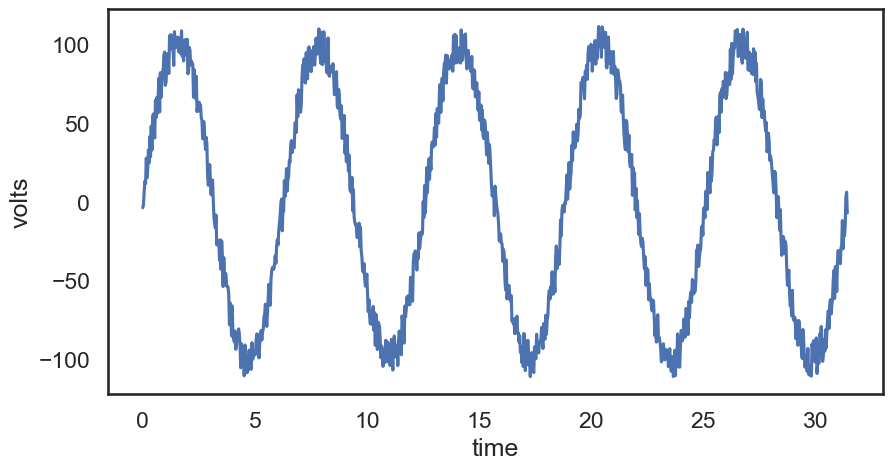

In [16]:
### BEGIN SOLUTION
sns.lineplot(data=data1, x="time", y="volts")
### END SOLUTION

OK interesting. Before we do any operations on this data, let's just take a look at a scatterplot version in Seaborn. Regenerate the plot above as a scatterplot with Seaborn. 

<AxesSubplot:xlabel='time', ylabel='volts'>

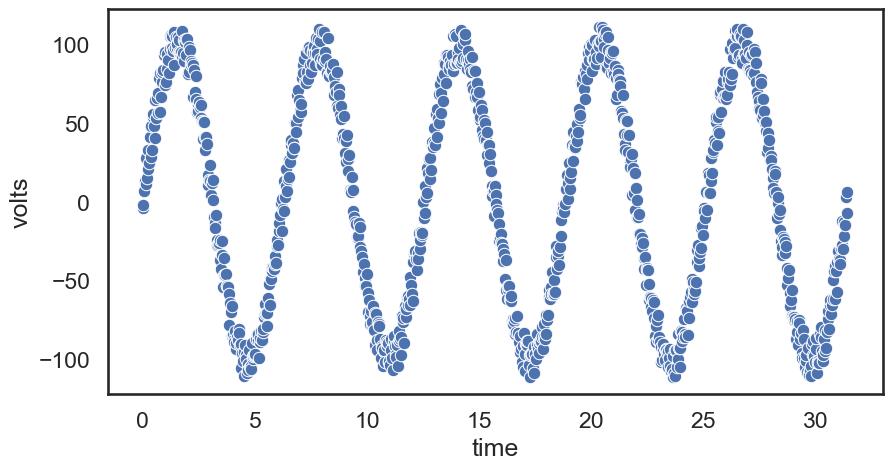

In [17]:
### BEGIN SOLUTION
sns.scatterplot(data=data1, x="time", y="volts")
### END SOLUTION

A few things to note:

- I think if I was only going to have this data in the figure, I might just use a lineplot. But if we are going to do some regression it could be an interesting view. It's a bit too many datapoints and there's a great deal of overlap so we do not see much of the subtlety of the data here.
- Wasn't that easy? We just changed one little thing, the call and a whole different plot type was rendered.

## Part II: Importing a binary file

OK, so now we have imported a CSV file, which is pretty standard. We learned how to get a raw file from github and avoid downloading the html formatted version. Great!

Now let's import a binary file. We are going to take in an excel sheet. Read the documentation [here](https://pandas.pydata.org/docs/user_guide/io.html#io-excel-reader) for accessing and reading an excel file.

The location to read from is also from our data repo:

https://github.com/drsimpkins-teaching/datasets/raw/main/data.xlsx


In [18]:
# Returns a DataFrame
data2 = pd.read_excel("https://github.com/drsimpkins-teaching/datasets/raw/main/data.xlsx", sheet_name="Sheet 1")



Note we can access particular sheets by including their name. There are as always several options.

Add the same labels for columns as earlier using the `columns` method below as we did before

In [19]:
#let's give the same column names 
data2.columns=["time","volts"]

Let's take a look at it as before

In [20]:
data2.head()

time  volts
0  0.00  -3.85
1  0.03  -1.94
2  0.06   6.50
3  0.09  12.93
4  0.13  11.44

In [21]:
data2.shape

(1001, 2)

In [22]:
assert len(data2)==1001
assert len(data2.loc[1])==2
assert data2.shape == (1001,2)

<AxesSubplot:xlabel='time', ylabel='volts'>

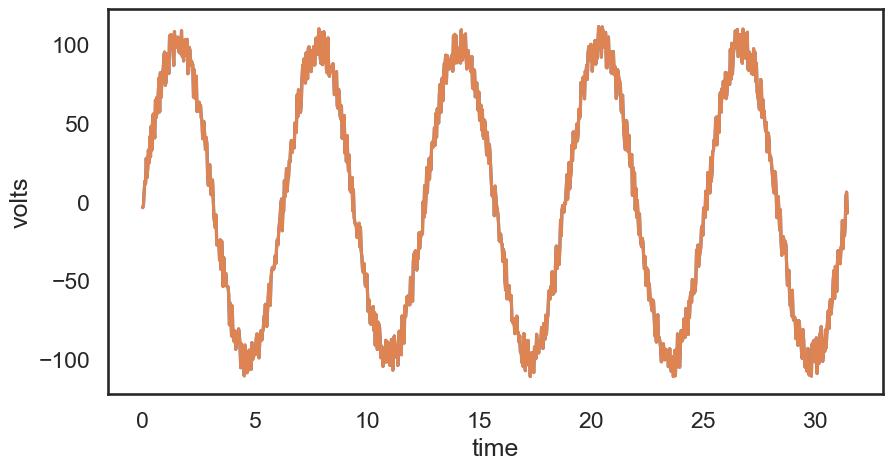

In [23]:
sns.lineplot(data=data1,x='time',y='volts')


sns.lineplot(data=data2,x='time',y='volts')


But we cannot see the two plots, they appear to be right on top of each other. Another way we might look is to subtract one vs. the other then compute the max difference...

In [24]:
test = data1['volts'].values - data2['volts'].values

In [25]:
max(test)

0.0

In [26]:
min(test)

0.0

In [27]:
assert max(test) ==0.0
assert min(test) ==0.0

<AxesSubplot:>

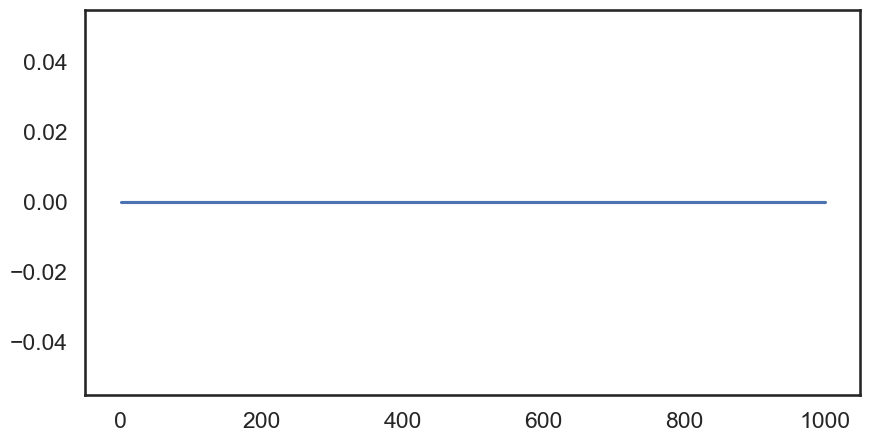

In [28]:
sns.lineplot(data=test)

So they appear to be the same. Great, since they are the same data!

Let's take a look at both at the same time. How can we do this? With subplots. As usual, fairly straightforward.

Use the plt.subplots() method to create 2 rows by 1 column of subplots, then plot each data set into the two respective subplots

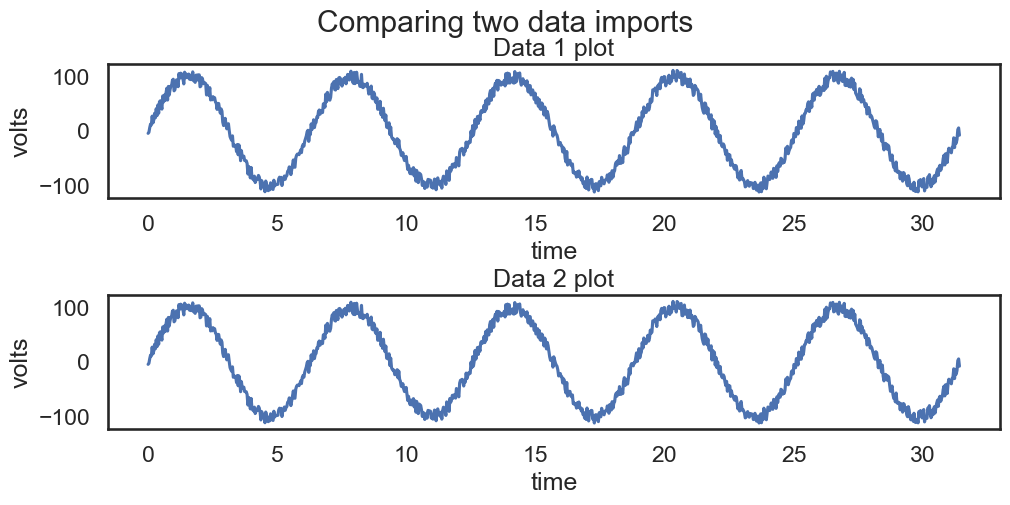

In [40]:
fig, ax = plt.subplots(2,1)
fig.suptitle('Comparing two data imports')

sns.lineplot(ax=ax[0], x=data1['time'], y=data1['volts'])
ax[0].set_title('Data 1 plot')

sns.lineplot(ax=ax[1], x=data2['time'], y=data2['volts'])
ax[1].set_title('Data 2 plot')


#we need to space them out so we can see the subfigure titles, or they will overlap
fig.tight_layout(pad=.2)


OK, great, I am convinced these are both importing correctly. But what if we only want to look at a piece of the data, zoom in on a specific section? We can plot a 'slice' using Pandas slicing. Plot only the first 100 or so points.

So we can use the `loc` method to grab the early portion of the data.



<AxesSubplot:xlabel='time', ylabel='volts'>

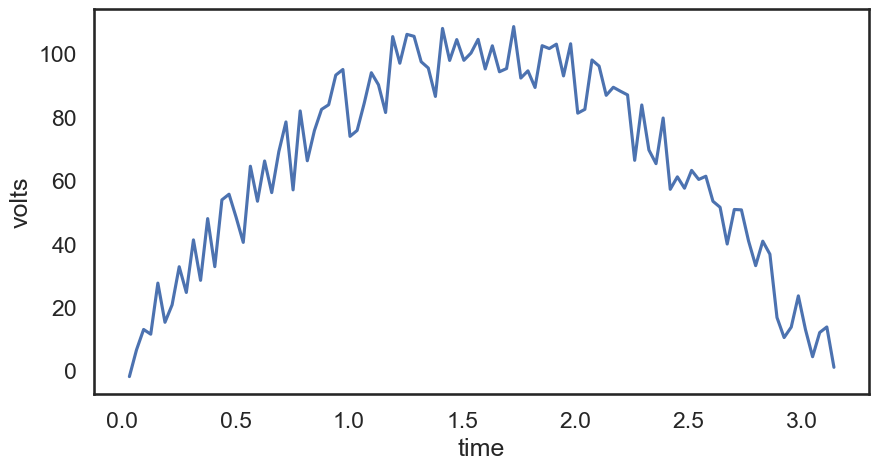

In [30]:
d_SL = data1.loc[1:100]

sns.lineplot(data=d_SL, x='time',y='volts')

Now we see a much more 'zoomed in' version of the plot. But what if we want a middle portion?

We can do that too! Simply use the same notation, but instead of starting at 1, start where you want and then end where you want. Let's plot `time=[150:200]`

Create a new DataFrame object called `d_SL` by assigning this new slice of data1 to it, then perform the same plot again, with the new variable.

<AxesSubplot:xlabel='time', ylabel='volts'>

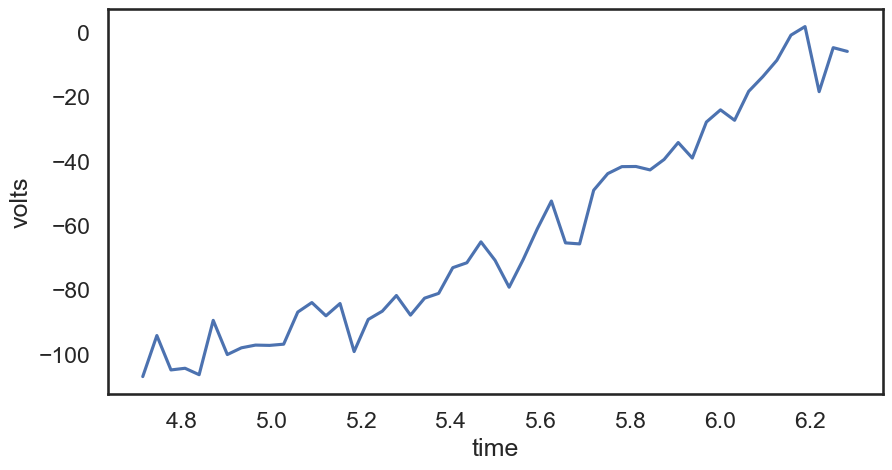

In [31]:
d_SL = data1.loc[150:200]

sns.lineplot(data=d_SL, x='time',y='volts')

In [32]:
assert len(d_SL)==51

Why is the length of that variable what it is? Consider what is included in a Pandas slice (read if you need to - is the first point included and last point, or if not which are included)? Write your answer below

Consider

In [33]:
x=[np.transpose(np.linspace(1,100,num=100)), np.transpose(np.linspace(105,200,num=95))]

np.shape(x)
x

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


[array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
         23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
         34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
         45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
         56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
         67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
         78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
         89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
        100.]),
 array([105.        , 106.0106383 , 107.0212766 , 108.03191489,
        109.04255319, 110.05319149, 111.06382979, 112.07446809,
        113.08510638, 114.09574468, 115.10638298, 116.11702128,
        117.12765957, 118.13829787, 119.14893617, 120.15957447,
        121.17021277, 122.18085106, 123.19148936, 124.20212766

## Part III : Pandas functions

We will be using Pandas for a variety of tasks throughout the summer session. Be sure you are comfortable with each of the following:

Pandas 
- Series
- DataFrame

Basic operations
- changing index and column labels
- reordering columns
- concatenation
- slicing using loc, iloc, at, iat
- removing NaNs and nulls
- removing duplicate values
- creating dataframes
- when to use series vs. dataframe
- accessing the raw values in a column


In [41]:
locals

<function locals()>

In [42]:
who

ax	 d_SL	 data1	 data2	 fig	 np	 pd	 plt	 sns	 
test	 x	 


In [43]:
whos

Variable   Type         Data/Info
---------------------------------
ax         ndarray      2: 2 elems, type `object`, 16 bytes
d_SL       DataFrame         time   volts\n150  4<...>\n\n[51 rows x 2 columns]
data1      DataFrame           time  volts\n0    <...>\n[1001 rows x 2 columns]
data2      DataFrame           time  volts\n0    <...>\n[1001 rows x 2 columns]
fig        Figure       Figure(1000x500)
np         module       <module 'numpy' from '/op<...>kages/numpy/__init__.py'>
pd         module       <module 'pandas' from '/o<...>ages/pandas/__init__.py'>
plt        module       <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
sns        module       <module 'seaborn' from '/<...>ges/seaborn/__init__.py'>
test       ndarray      1001: 1001 elems, type `float64`, 8008 bytes
x          list         n=2
